In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv('salary_data_cleaned.csv')
data_frame.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,min_salary,max_salary,avg_salary,job_state,job_simp,seniority,desc_len,age,python_yn,sql_yn
0,Geospatial Researcher/Data Scientist IV,$76K - $120K (Glassdoor est.),Battelle delivers when others can’t. We conduc...,3.6,Battelle,"Fort Belvoir, VA",1001 to 5000 Employees,1929,Nonprofit Organization,Research & Development,...,76.0,120.0,98.0,VA,data scientist,na,984,93,0,0
1,Senior Data Scientist,$101K - $138K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,...,101.0,138.0,119.5,VA,data scientist,senior,1127,-1,0,0
2,Software Integrator / Data Scientist - Expert ...,$74K - $109K (Glassdoor est.),*** Must have TS/SCI ***\nJOB DESCRIPTION:\nIn...,4.6,Que Technology Group,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,...,74.0,109.0,91.5,VA,data scientist,na,594,-1,0,0
3,Lead Data Scientist,$116K - $161K (Glassdoor est.),Tensure is a fully-remote technology consultin...,3.8,Tensure Consulting,"Washington, DC",1 to 50 Employees,-1,Company - Private,-1,...,116.0,161.0,138.5,DC,data scientist,senior,853,-1,1,1
4,Data Scientist,$76K - $108K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,...,76.0,108.0,92.0,VA,data scientist,na,1325,-1,0,0


In [39]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3270 non-null   object 
 1   Salary Estimate    3270 non-null   object 
 2   Job Description    3270 non-null   object 
 3   Rating             3270 non-null   float64
 4   Company Name       3270 non-null   object 
 5   Location           3270 non-null   object 
 6   Size               3270 non-null   object 
 7   Founded            3270 non-null   int64  
 8   Type of ownership  3270 non-null   object 
 9   Industry           3270 non-null   object 
 10  Sector             3270 non-null   object 
 11  Revenue            3270 non-null   object 
 12  hourly             3270 non-null   int64  
 13  employer provided  3270 non-null   int64  
 14  employer estimate  3270 non-null   int64  
 15  min_salary         3151 non-null   float64
 16  max_salary         3151 

In [23]:
data_frame.shape

(3270, 25)

In [3]:
data_frame.describe()

,Rating,Founded,hourly,employer provided,employer estimate,min_salary,max_salary,avg_salary,desc_len,age,python_yn,sql_yn
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3151.000000,3151.000000,3270.000000,3270.000000,3270.00000,3270.000000,3270.000000
mean,3.716942,1616.837920,0.012232,0.088685,0.311621,95.046334,144.265630,119.175229,1291.596636,51.73578,0.088379,0.058716
std,1.147434,746.275914,0.109939,0.284332,0.463227,40.638074,56.970058,46.777354,1041.434430,60.08553,0.283889,0.235128
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,26.000000,30.000000,26.000000,50.000000,-1.00000,0.000000,0.000000
25%,3.700000,1850.000000,0.000000,0.000000,0.000000,67.000000,107.000000,87.000000,752.000000,7.00000,0.000000,0.000000
50%,4.000000,1968.000000,0.000000,0.000000,0.000000,85.000000,129.000000,107.000000,974.500000,26.00000,0.000000,0.000000
75%,4.200000,2001.000000,0.000000,0.000000,1.000000,110.000000,163.000000,133.500000,1375.000000,80.00000,0.000000,0.000000
max,5.000000,2022.000000,1.000000,1.000000,1.000000,253.000000,367.000000,310.000000,14969.000000,397.00000,1.000000,1.000000


Text(0.5, 1.0, 'Histogram of Rating')

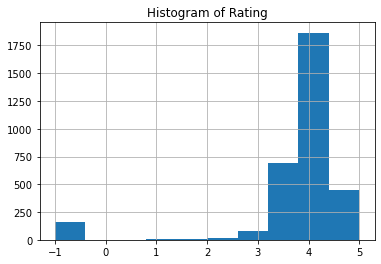

In [47]:
data_frame['Rating'].hist()
plt.title("Histogram of Rating")

It looks very similar to normal distribution.

Text(0.5, 1.0, 'Histogram of Average Salary')

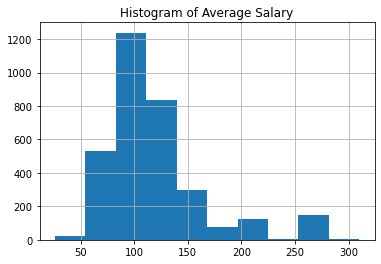

In [48]:
data_frame['avg_salary'].hist()
plt.title("Histogram of Average Salary")

Text(0.5, 1.0, 'Histogram of Age')

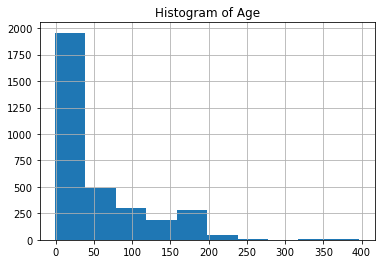

In [49]:
data_frame['age'].hist()
plt.title("Histogram of Age")

It does not look like normal distribution. It follows exponential distribution. To include this variable in modeling, I might have to normalize it. Expecially, if I am using regression.

Text(0.5, 1.0, 'Histogram of description length')

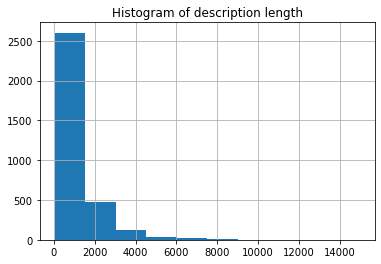

In [50]:
data_frame['desc_len'].hist()
plt.title("Histogram of description length")

In [35]:
data_frame['desc_len'].sort_values()

2550       50
1035       53
3046       56
105        64
119        64
        ...  
1830     8150
213      8258
216      9047
2038    12428
1793    14969
Name: desc_len, Length: 3270, dtype: int64

<AxesSubplot:>

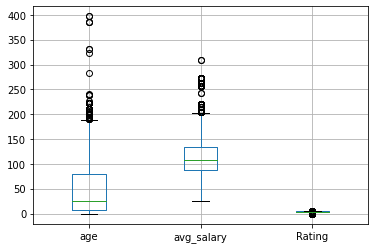

In [36]:
data_frame.boxplot(column = ['age','avg_salary'])

<AxesSubplot:>

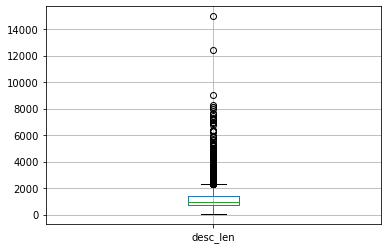

In [38]:
data_frame.boxplot(column = ['desc_len'])

<AxesSubplot:>

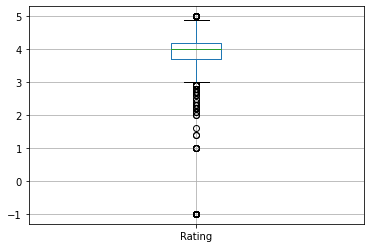

In [37]:
data_frame.boxplot(column = ['Rating'])

In [40]:
# Correlation
data_frame[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.112934,0.156562,0.227377
avg_salary,-0.112934,1.000000,0.065019,-0.054544
Rating,0.156562,0.065019,1.000000,0.068873
desc_len,0.227377,-0.054544,0.068873,1.000000


<AxesSubplot:>

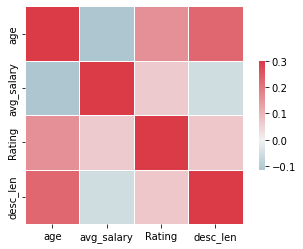

In [44]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_frame[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
data_frame.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'employer estimate', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'job_simp', 'seniority', 'desc_len', 'age', 'python_yn',
       'sql_yn'],
      dtype='object')

In [54]:
df_cat = data_frame[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'job_state', 'python_yn', 'sql_yn', 'job_simp', 'seniority']]

graph for Location: total = 356


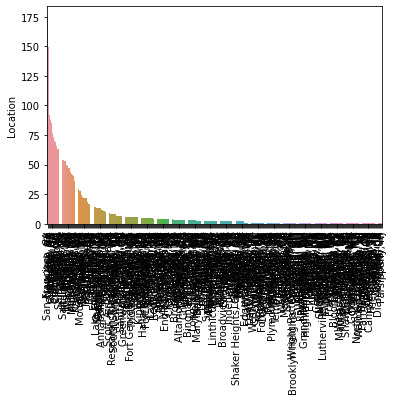

graph for Size: total = 9


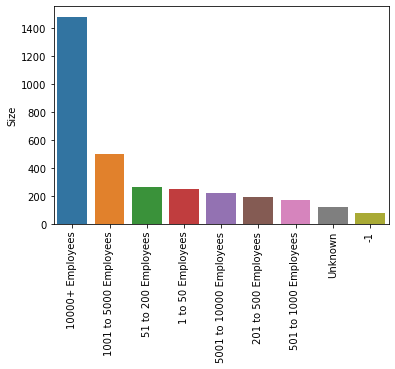

graph for Type of ownership: total = 13


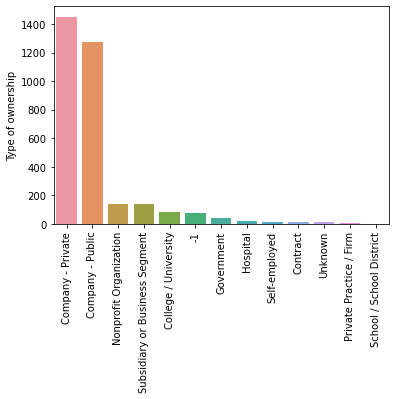

graph for Industry: total = 92


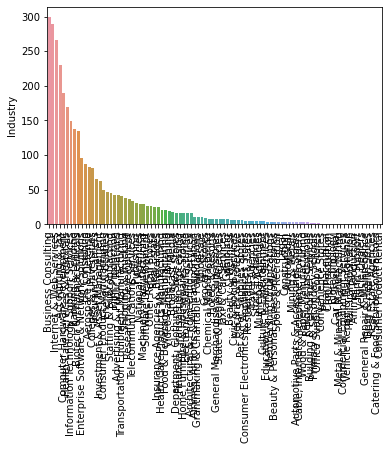

graph for Sector: total = 26


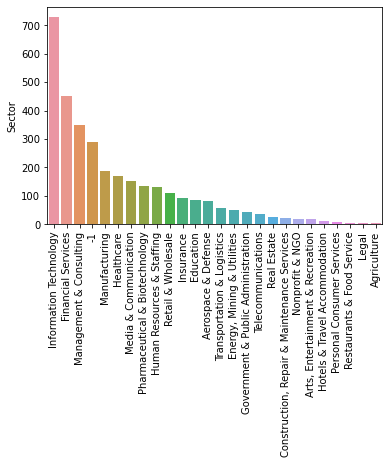

graph for Revenue: total = 11


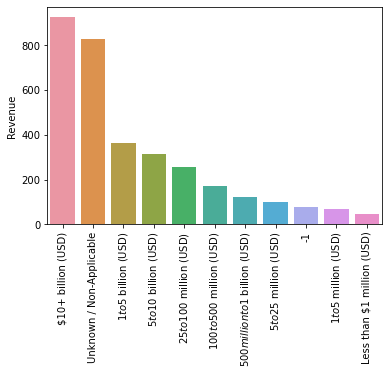

graph for Company Name: total = 1418


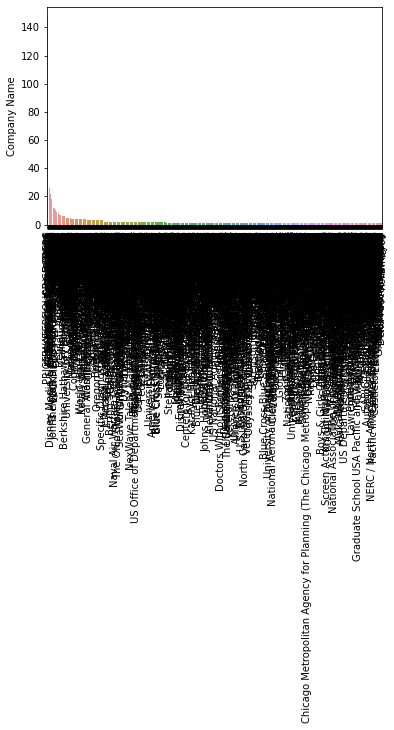

graph for job_state: total = 31


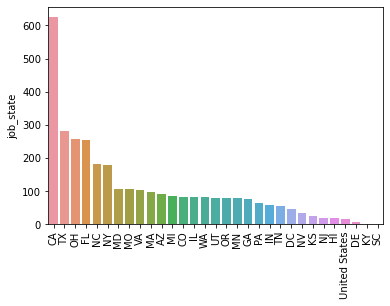

graph for python_yn: total = 2


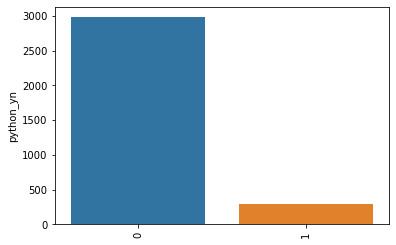

graph for sql_yn: total = 2


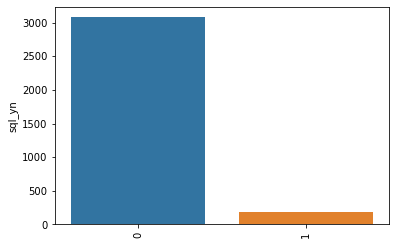

graph for job_simp: total = 7


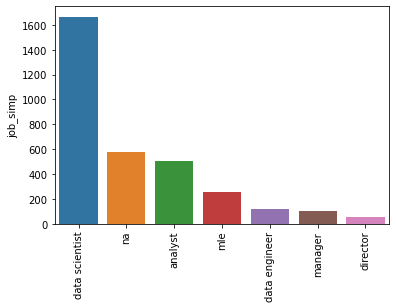

graph for seniority: total = 3


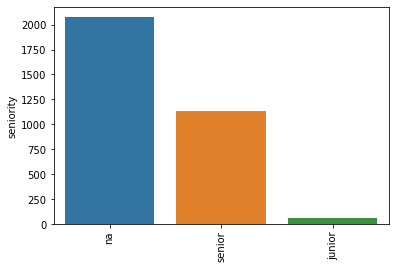

In [55]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

1. Size - Most job postings are with companies who have 10000+ employees
2. Type of ownership - Private companies are the most common among the companies who have posted data science jobs.
3. Sector - Most of the data science job openings are in IT. Second being Financial Services.
4. Revenue - Biggest companies ($10+ Billion USD) are hiring most of the data scientists.
5. Job State - California has most of the data scientist jobs. Next is Texas.

graph for Location: total = 20


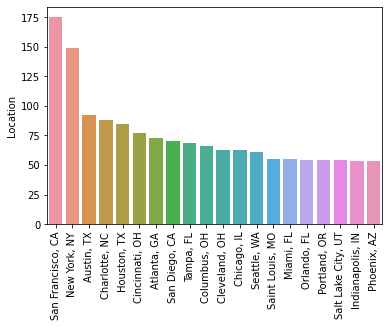

graph for Industry: total = 20


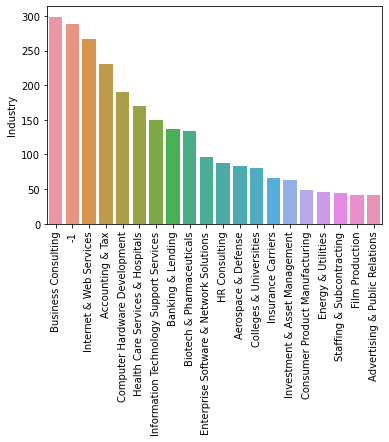

graph for Company Name: total = 20


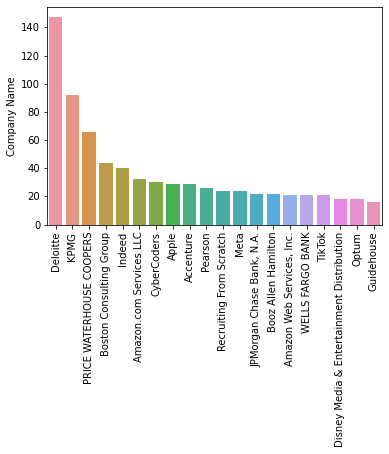

In [57]:
# As few plots are not clear, taking only the top 20 values for those
for i in df_cat[['Location','Industry','Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

1. San Francisco has most of the data scinetist job openings with New York City being the next one.
2. Interestingly, business consulting is the highest data scientist hiring sector.
3. Business consulting compnaies like Deloitte, KPMG, PwC and BCG has most of the data science job postings.

In [63]:
# analyzing salary by different categories
pd.pivot_table(data_frame, index = 'job_simp', values = 'avg_salary').sort_values(by = 'avg_salary',ascending=False)

,avg_salary
job_simp,
director,151.794118
data scientist,128.060024
data engineer,117.487500
mle,115.653543
manager,113.613861
analyst,105.542659
na,105.349303


1. Data scientist positions offer higher pay than data engineer and data analyst.
2. Data Engineer position offer higher pay than data analyst.
3. Strange points:
    a) Manager jobs offer less pay than data scientist or data engineer
    b) MLE jobs have less pay than data scientist or data engineer

In [66]:
# adding further brekadown of seniority in these roles
pd.pivot_table(data_frame, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        junior      96.500000
               na         108.760870
               senior     104.633075
data engineer  junior     116.375000
               na         110.119403
               senior     127.653061
data scientist junior     114.368421
               na         126.062604
               senior     134.834884
director       na         156.644444
               senior     115.416667
manager        na         114.378205
               senior     111.021739
mle            junior     110.666667
               na         116.387821
               senior     114.605263
na             junior     104.227273
               na         106.361244
               senior     102.517241

In [103]:
# breakdown of salary in each state
pd.pivot_table(data_frame, index = ['job_state'], values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
NY,161.813889
CA,154.352000
SC,147.500000
NJ,135.944444
TX,125.064057
MD,123.396226
CO,120.969880
FL,120.086275
WA,119.823171


The results are expected. Given CA and NY have high cost of living. Salaries in these states are higher than other states. But South Carolina on third is surprising. Let's check this further.

In [105]:
pd.pivot_table(data_frame, index = ['job_state'],values = 'avg_salary',aggfunc = [np.mean,'count']).sort_values(by = [( 'mean', 'avg_salary')],ascending=False)

,mean,count
,avg_salary,avg_salary
job_state,,
NY,161.813889,180
CA,154.352000,625
SC,147.500000,1
NJ,135.944444,18
TX,125.064057,281
MD,123.396226,106
CO,120.969880,83
FL,120.086275,255


The reason South Carolina is on third position seems to be due to a single data point.

In [110]:
# to see output completely
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [111]:
# breakdown of salary by state and role
pd.pivot_table(data_frame, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = [np.mean,'count']).sort_values('job_state', ascending = False)

mean      count
                              avg_salary avg_salary
job_state     job_simp                             
WA            na              114.978261         23
              mle             113.333333          3
              manager         201.500000          1
              data scientist  124.900000         45
              data engineer   114.500000          1
              analyst         100.500000          9
VA            data scientist  117.247191         89
              analyst         107.250000          2
              data engineer   107.250000          2
              mle             111.625000          4
              na              101.200000          5
United States na               81.166667          3
              manager          93.500000          1
              director         93.500000          1
              data scientist  125.642857          7
              data engineer   105.000000          2
              analyst          77.333333          3
UT            director        107.000000          2
              analyst         107.500000         19
              data engineer   109.400000          5
              data scientist  103.000000         26
              mle             111.000000          5
              manager         104.250000          4
              na              107.157895         19
TX            na              108.360465         43
              mle             132.958333         24
              manager         180.875000          4
              director        155.666667          3
              data scientist  121.251701        147
              data engineer   127.307692         13
              analyst         140.914894         47
TN            na               59.500000          4
              manager          60.500000          2
              data scientist   95.650000         30
              analyst          62.722222         18
SC            analyst         147.500000          1
PA            data scientist   96.764706         34
              data engineer    91.800000          5
              analyst          84.166667          6
              mle              85.000000          9
              na               84.950000         10
OR            director         79.000000          2
              data engineer   113.000000          2
              data scientist  101.204545         22
              analyst          85.900000         15
              manager         103.333333          6
              mle             102.617647         17
              na              100.687500         16
OH            na               87.921875         64
              mle              87.613636         22
              manager          87.500000         20
              director         87.000000          1
              data scientist   96.566265         83
              data engineer    91.062500         16
              analyst          88.340000         50
NY            director        155.666667          3
              analyst         165.650000         30
              data scientist  162.887387        111
              data engineer   152.428571          7
              mle             140.250000         10
              na              165.263158         19
NV            na               82.333333          6
              mle             119.666667          3
              manager         133.500000          3
              data scientist  104.277778          9
              data engineer   107.833333          3
              analyst          96.650000         10
NJ            data scientist  139.785714         14
              analyst         122.500000          4
NC            director        120.200000          5
              analyst         115.833333         27
              data engineer   120.857143          7
              data scientist  112.506667         75
              na               98.715909         44
              manager         11

1. CA has proportinally higher data scientist 412/625=0.66 jobs than NY 111/180=0.62

In [113]:
#filtering only data scientist roles
pd.pivot_table(data_frame[data_frame.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary',aggfunc = [np.mean,'count']).sort_values([( 'mean', 'avg_salary')], ascending = False)

,mean,count
,avg_salary,avg_salary
job_state,,
CA,165.877427,412
NY,162.887387,111
NJ,139.785714,14
United States,125.642857,7
WA,124.900000,45
MD,122.301587,63
TX,121.251701,147
DC,120.824324,37


1. CA and NY has highest data scientist salaries but CA (412) has more data scientist job postings than NY (111).

In [120]:
data_frame.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'employer estimate', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'job_simp', 'seniority', 'desc_len', 'age', 'python_yn',
       'sql_yn'],
      dtype='object')

In [126]:
# Creating pivot tables of rest of the columns
df_pivots = data_frame[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided','employer estimate', 'python_yn', 'sql_yn','Type of ownership','avg_salary']]
for i in df_pivots.columns:
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary',aggfunc = [np.mean,'count']).sort_values([( 'mean', 'avg_salary')], ascending = False))

              mean      count
        avg_salary avg_salary
Rating                       
 4.7    158.710526         38
 4.4    156.174699        166
 1.6    155.000000          1
 4.8    134.330882         68
 4.9    133.700000         20
 1.0    133.250000          6
 4.2    131.625448        279
 5.0    126.681818         66
 4.6    126.187500         40
 3.0    125.875000         24
 4.5    124.600000         50
 3.3    122.050562         89
 4.1    120.926910        301
 3.9    119.385390        397
 4.3    118.606667        150
-1.0    117.129747        158
 3.6    114.989744        195
 3.5    113.289773         88
 2.2    110.875000          8
 3.4    110.800000         60
 3.8    110.084559        272
 3.1    108.788462         26
 2.8    107.687500          8
 4.0    107.572961        466
 3.7    107.323276        232
 2.0    103.000000          2
 3.2    101.758065         31
 2.9    100.833333          9
 2.6    100.833333          3
 2.7     95.750000          6
 2.1     8

ValueError: Grouper for 'avg_salary' not 1-dimensional

1. Rating
    a) Companies with higher rating seems to be offer higher salary. This can be random too as companies with 4.0 rating offers less than the higher arted companies. But companies with lower ratings seems to be low salaries.
    b) There is one company with high salary of $155K with poor rating of 1.6. Seems like an outlier as it is only a single data point.

2. Sector
    a) IT has the highest salary and highest number of jobs . Financial Services has second number of job openings but their pay is lower in comparison to other sectors
    b) Real estate pays well but doesn't have many job postings.
    c) Agriculture, Restaurant, and Legal pays lowest salaries. They have least number of data science job postings too
    d) Surprisngly, non-profit pays better than many other sectors.
    
3. Revenue
    a) Conmpanies with revenue between $5 to $25 million (USD) pays highest salary. These are lower revenue companies.
    b) Companies with mid - level revenue between $25 to $100 million (USD) and $100 to $500 million (USD) pay low.
    
4. Wages (Hourly)
    a) Companies with hourly wages pay less with avg salry of 104.6K (USD)
    
5. Skills (Python, SQL)
    a) Looks like Python and SQL are equally important for data scienstist roles as they offer similar salaries
    
 6. Type of ownership
     a) Subsidiary or Business Segment pays highest salary but they don't offer a lot of jobs
     b) Private Practice / Firm pays least. They also have very less job postings.